In [1]:
import pandas as pd

In [2]:
df=pd.read_csv('car details.csv')

In [3]:
df.head()

,name,year,selling_price,km_driven,fuel,seller_type,transmission,owner
0,Maruti 800 AC,2007,60000,70000,Petrol,Individual,Manual,First Owner
1,Maruti Wagon R LXI Minor,2007,135000,50000,Petrol,Individual,Manual,First Owner
2,Hyundai Verna 1.6 SX,2012,600000,100000,Diesel,Individual,Manual,First Owner
3,Datsun RediGO T Option,2017,250000,46000,Petrol,Individual,Manual,First Owner
4,Honda Amaze VX i-DTEC,2014,450000,141000,Diesel,Individual,Manual,Second Owner


In [4]:
df.shape

(4340, 8)

In [5]:
print(df.seller_type.unique())
print(df.transmission.unique())
print(df.owner.unique())
print(df.fuel.unique())

['Individual' 'Dealer' 'Trustmark Dealer']
['Manual' 'Automatic']
['First Owner' 'Second Owner' 'Fourth & Above Owner' 'Third Owner'
 'Test Drive Car']
['Petrol' 'Diesel' 'CNG' 'LPG' 'Electric']


In [6]:
df.isnull().sum()

name             0
year             0
selling_price    0
km_driven        0
fuel             0
seller_type      0
transmission     0
owner            0
dtype: int64

In [7]:
df.describe()

,year,selling_price,km_driven
count,4340.000000,4.340000e+03,4340.000000
mean,2013.090783,5.041273e+05,66215.777419
std,4.215344,5.785487e+05,46644.102194
min,1992.000000,2.000000e+04,1.000000
25%,2011.000000,2.087498e+05,35000.000000
50%,2014.000000,3.500000e+05,60000.000000
75%,2016.000000,6.000000e+05,90000.000000
max,2020.000000,8.900000e+06,806599.000000


In [8]:
df.columns

Index(['name', 'year', 'selling_price', 'km_driven', 'fuel', 'seller_type',
       'transmission', 'owner'],
      dtype='object')

In [9]:
final_ds = df[['year', 'selling_price', 'km_driven', 'fuel', 'seller_type',
       'transmission', 'owner']]

In [10]:
final_ds.head()

,year,selling_price,km_driven,fuel,seller_type,transmission,owner
0,2007,60000,70000,Petrol,Individual,Manual,First Owner
1,2007,135000,50000,Petrol,Individual,Manual,First Owner
2,2012,600000,100000,Diesel,Individual,Manual,First Owner
3,2017,250000,46000,Petrol,Individual,Manual,First Owner
4,2014,450000,141000,Diesel,Individual,Manual,Second Owner


In [11]:
final_ds['Current_year'] = 2023

In [12]:
final_ds['no_year'] = final_ds.Current_year - final_ds.year

In [13]:
final_ds.drop(['year'],axis=1,inplace=True)

In [14]:
final_ds.drop(['Current_year'],axis=1,inplace=True)

In [15]:
final_ds.head()

,selling_price,km_driven,fuel,seller_type,transmission,owner,no_year
0,60000,70000,Petrol,Individual,Manual,First Owner,16
1,135000,50000,Petrol,Individual,Manual,First Owner,16
2,600000,100000,Diesel,Individual,Manual,First Owner,11
3,250000,46000,Petrol,Individual,Manual,First Owner,6
4,450000,141000,Diesel,Individual,Manual,Second Owner,9


In [16]:
final_ds = pd.get_dummies(final_ds,drop_first=True)

In [17]:
final_ds.head()

,selling_price,km_driven,no_year,fuel_Diesel,fuel_Electric,fuel_LPG,fuel_Petrol,seller_type_Individual,seller_type_Trustmark Dealer,transmission_Manual,owner_Fourth & Above Owner,owner_Second Owner,owner_Test Drive Car,owner_Third Owner
0,60000,70000,16,0,0,0,1,1,0,1,0,0,0,0
1,135000,50000,16,0,0,0,1,1,0,1,0,0,0,0
2,600000,100000,11,1,0,0,0,1,0,1,0,0,0,0
3,250000,46000,6,0,0,0,1,1,0,1,0,0,0,0
4,450000,141000,9,1,0,0,0,1,0,1,0,1,0,0


In [18]:
final_ds.corr()

,selling_price,km_driven,no_year,fuel_Diesel,fuel_Electric,fuel_LPG,fuel_Petrol,seller_type_Individual,seller_type_Trustmark Dealer,transmission_Manual,owner_Fourth & Above Owner,owner_Second Owner,owner_Test Drive Car,owner_Third Owner
selling_price,1.000000,-0.192289,-0.413922,0.282947,-0.005095,-0.042434,-0.269453,-0.236798,0.110176,-0.530205,-0.078725,-0.161986,0.048799,-0.111326
km_driven,-0.192289,1.000000,0.419688,0.285396,-0.001372,0.036652,-0.291139,0.182663,-0.089858,0.120226,0.097349,0.195203,-0.083445,0.194713
no_year,-0.413922,0.419688,1.000000,-0.121424,0.025540,0.051266,0.114908,0.173703,-0.100225,0.143800,0.186361,0.292349,-0.095795,0.244308
fuel_Diesel,0.282947,0.285396,-0.121424,1.000000,-0.015063,-0.072422,-0.970934,-0.035314,-0.007911,-0.048098,-0.021054,0.003524,-0.010575,0.009373
fuel_Electric,-0.005095,-0.001372,0.025540,-0.015063,1.000000,-0.001108,-0.014856,-0.026118,-0.002355,-0.044746,-0.002094,0.025960,-0.000952,-0.004166
fuel_LPG,-0.042434,0.036652,0.051266,-0.072422,-0.001108,1.000000,-0.071427,0.035122,-0.011324,0.024764,0.013384,0.030141,-0.004577,0.004836
fuel_Petrol,-0.269453,-0.291139,0.114908,-0.970934,-0.014856,-0.071427,1.000000,0.029845,0.012489,0.039614,0.011502,-0.012717,0.012427,-0.008502
seller_type_Individual,-0.236798,0.182663,0.173703,-0.035314,-0.026118,0.035122,0.029845,1.000000,-0.266904,0.214163,0.072322,0.186573,-0.107886,0.140823
seller_type_Trustmark Dealer,0.110176,-0.089858,-0.100225,-0.007911,-0.002355,-0.011324,0.012489,-0.266904,1.000000,-0.042346,-0.021395,-0.076764,-0.009729,-0.042578
transmission_Manual,-0.530205,0.120226,0.143800,-0.048098,-0.044746,0.024764,0.039614,0.214163,-0.042346,1.000000,0.035597,0.068068,0.009152,0.030802


In [19]:
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

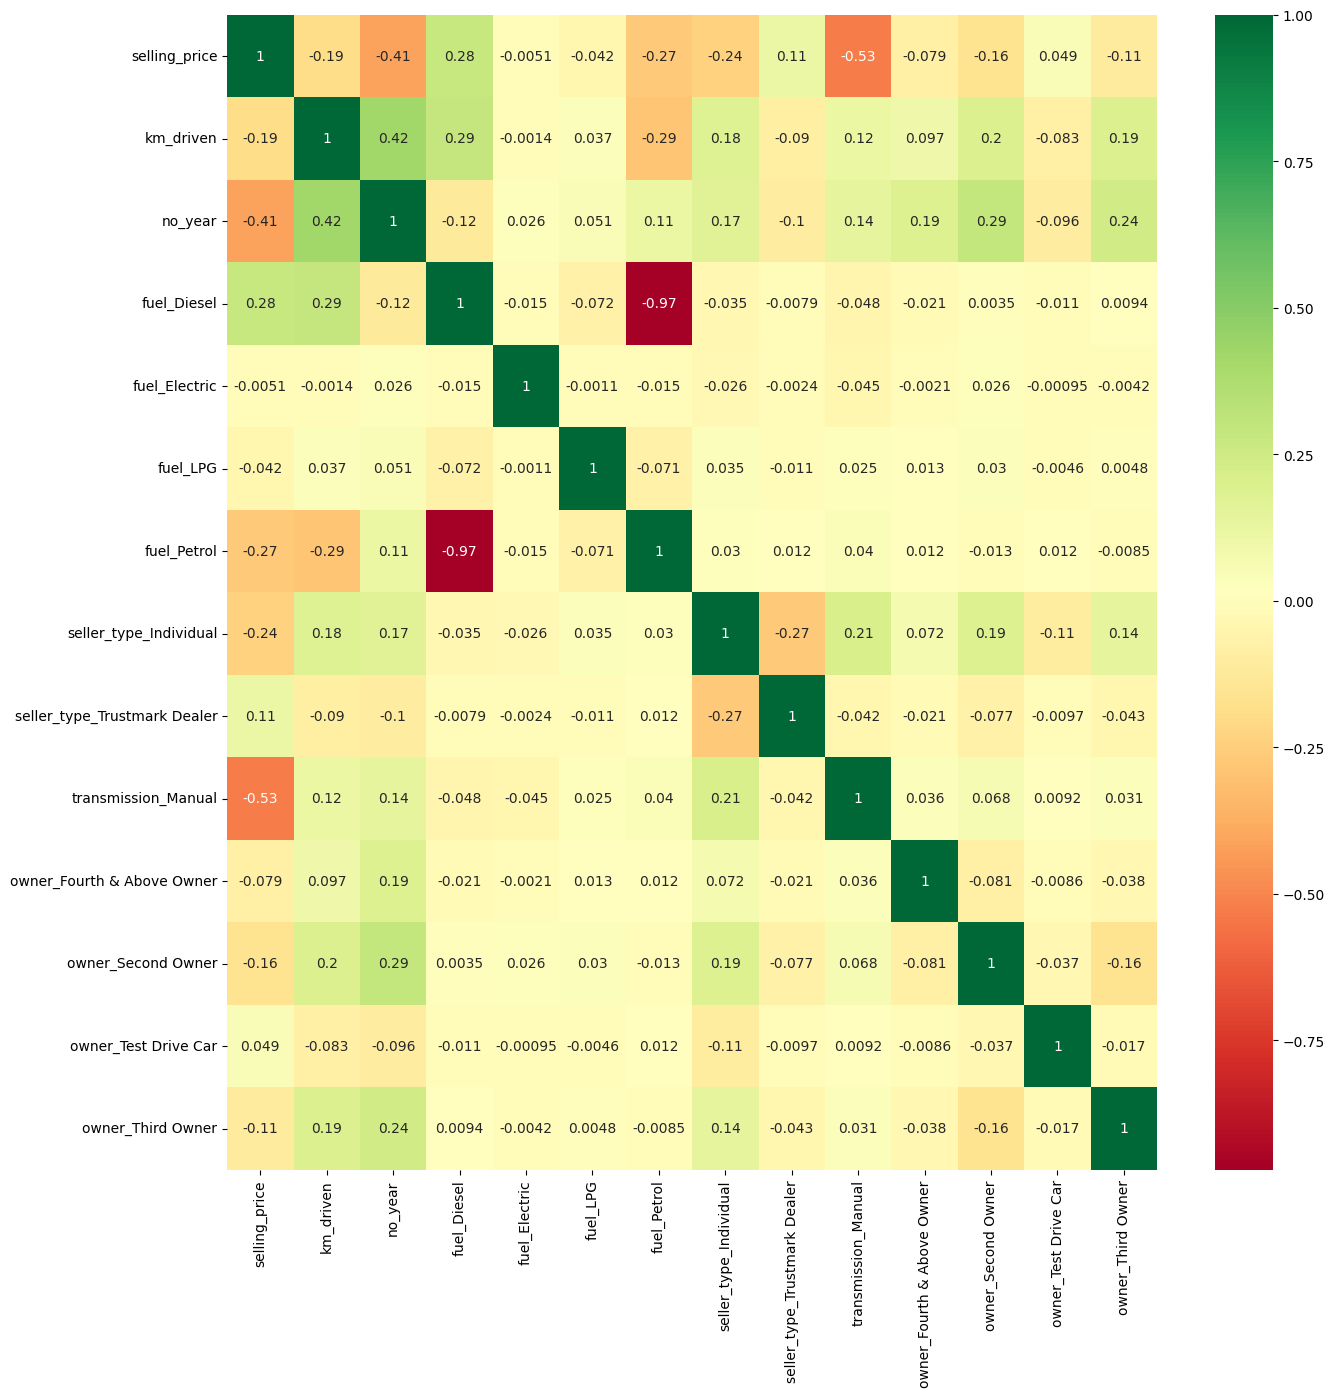

In [20]:
corrmat = final_ds.corr()
top_corr_features = corrmat.index
plt.figure(figsize=(15,15))
g = sns.heatmap(final_ds[top_corr_features].corr(),annot=True,cmap="RdYlGn")

In [21]:
final_ds.head()

,selling_price,km_driven,no_year,fuel_Diesel,fuel_Electric,fuel_LPG,fuel_Petrol,seller_type_Individual,seller_type_Trustmark Dealer,transmission_Manual,owner_Fourth & Above Owner,owner_Second Owner,owner_Test Drive Car,owner_Third Owner
0,60000,70000,16,0,0,0,1,1,0,1,0,0,0,0
1,135000,50000,16,0,0,0,1,1,0,1,0,0,0,0
2,600000,100000,11,1,0,0,0,1,0,1,0,0,0,0
3,250000,46000,6,0,0,0,1,1,0,1,0,0,0,0
4,450000,141000,9,1,0,0,0,1,0,1,0,1,0,0


In [22]:
X = final_ds.iloc[:,1:]
y = final_ds.iloc[:,0]

In [23]:
X.head()

,km_driven,no_year,fuel_Diesel,fuel_Electric,fuel_LPG,fuel_Petrol,seller_type_Individual,seller_type_Trustmark Dealer,transmission_Manual,owner_Fourth & Above Owner,owner_Second Owner,owner_Test Drive Car,owner_Third Owner
0,70000,16,0,0,0,1,1,0,1,0,0,0,0
1,50000,16,0,0,0,1,1,0,1,0,0,0,0
2,100000,11,1,0,0,0,1,0,1,0,0,0,0
3,46000,6,0,0,0,1,1,0,1,0,0,0,0
4,141000,9,1,0,0,0,1,0,1,0,1,0,0


In [24]:
y.head()

0     60000
1    135000
2    600000
3    250000
4    450000
Name: selling_price, dtype: int64

In [25]:
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.svm import SVR
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.ensemble import ExtraTreesRegressor

In [26]:
models = []

models.append(('Linear Regression', LinearRegression()))
models.append(('Decision Tree', DecisionTreeRegressor()))
models.append(('Random Forest', RandomForestRegressor()))
models.append(('Support Vector Regression', SVR()))
models.append(('Gradient Boosting Regression', GradientBoostingRegressor()))
models.append(('K-Nearest Neighbors', KNeighborsRegressor()))
models.append(('Extra Trees', ExtraTreesRegressor()))

In [27]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2)

In [28]:
from sklearn.metrics import r2_score
r2_scores_initial = []

for name, model in models:
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    r2_sco = r2_score(y_test, y_pred)
    r2_scores_initial.append(r2_sco)
    print(name, 'r2_score:', r2_sco)

Linear Regression r2_score: 0.4785643595387238
Decision Tree r2_score: 0.5583821737879056
Random Forest r2_score: 0.6781940354450773
Support Vector Regression r2_score: -0.07361722930217618
Gradient Boosting Regression r2_score: 0.6653091002504647
K-Nearest Neighbors r2_score: 0.460023558783629
Extra Trees r2_score: 0.7198721076903811


In [29]:
from sklearn.model_selection import cross_val_score, KFold

k_folds = KFold(n_splits=5, shuffle=True, random_state=26)
r2_scores_final = []

for name, model in models:
    accuracy_scores = cross_val_score(model, X_train, y_train, cv=k_folds, scoring='r2')
    score = accuracy_scores.mean()
    r2_scores_final.append(score)
    print(name, 'mean r2_score:', score)

Linear Regression mean r2_score: 0.45109566725394484
Decision Tree mean r2_score: 0.3997506092216811
Random Forest mean r2_score: 0.6005331633199514
Support Vector Regression mean r2_score: -0.06731878179333602
Gradient Boosting Regression mean r2_score: 0.6322089999371513
K-Nearest Neighbors mean r2_score: 0.394105273539562
Extra Trees mean r2_score: 0.5614698744548995


In [30]:
for i in range(len(models)):
    if r2_scores_final[i] > r2_scores_initial[i]:
        print(f"{models[i][0]}: r2 score improved from {r2_scores_initial[i]} to {r2_scores_final[i]}")

Support Vector Regression: r2 score improved from -0.07361722930217618 to -0.06731878179333602


In [34]:
best_model_index_1 = r2_scores_final.index(max(r2_scores_final))
best_model_index_2 = r2_scores_initial.index(max(r2_scores_initial))
if(r2_scores_final[best_model_index_1] > r2_scores_initial[best_model_index_2]):
    best_model_index = best_model_index_1
    best_r2_score = r2_scores_final[best_model_index_1]
else: 
    best_model_index = best_model_index_2
    best_r2_score = r2_scores_initial[best_model_index_2]

print("The best model is",models[best_model_index][0],"with r2_score =",best_r2_score)

best_model = models[best_model_index][1]
best_model.fit(X_train, y_train)

y_pred = best_model.predict(X_test)

The best model is Extra Trees with r2_score = 0.7198721076903811


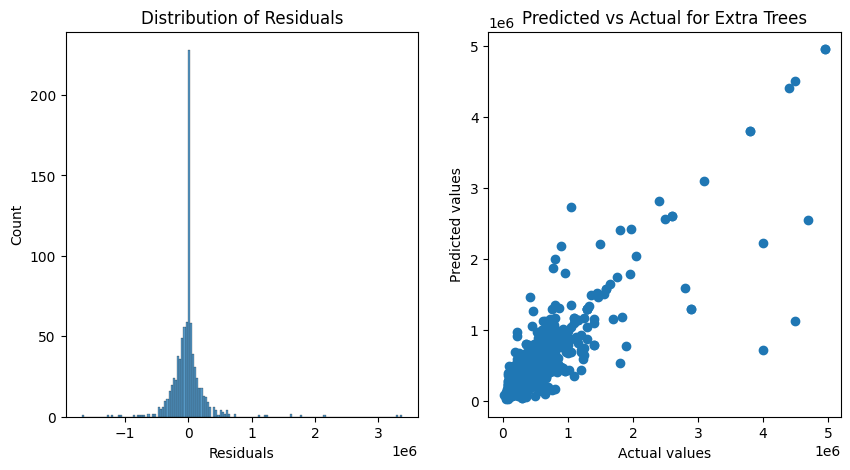

In [35]:
fig, axes = plt.subplots(ncols=2, figsize=(10, 5))

# plot the distribution of the residuals using a distplot on the left side
sns.histplot(y_test - y_pred, kde=False, ax=axes[0])
axes[0].set_title('Distribution of Residuals')
axes[0].set_xlabel('Residuals')
axes[0].set_ylabel('Count')

# plot the relationship between the predicted and actual target values using a scatter plot on the right side
axes[1].scatter(y_test, y_pred)
axes[1].set_title(f'Predicted vs Actual for {models[best_model_index][0]}')
axes[1].set_xlabel('Actual values')
axes[1].set_ylabel('Predicted values')

plt.show()

In [36]:
import pickle
file = open('model.pkl', 'wb')

pickle.dump(best_model, file)